In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
import shutil
from scipy.ndimage import gaussian_filter
from PIL import Image
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
POINT_LABELS = {0: "nose", 1: "torso",2: "r_shoulder",3: "r_arm", 4: "r_wrist", 5: "l_shoulder", 6: "l_arm", 7: "l_wrist", 8:"r_hip", 9:"",10:"",11:"l_hip",12:"",13:"", 14:"r_eye", 15:"l_eye", 16: "r_ear", 17: "l_ear"}
ATTRIBUTES = [i for i in POINT_LABELS.values() if i!=""]
INDICES = [i for i in POINT_LABELS.keys() if POINT_LABELS[i] in ATTRIBUTES]

In [3]:
IMG_DIR = "/kaggle/input/acgpn-dataset/ACGPN_traindata/train_img/"   #your image directory here
POSE_DIR = "/kaggle/input/acgpn-dataset/ACGPN_traindata/train_pose/"  #your pose directory here

In [4]:
def get_points(img_paths):
    '''
    Input: takes a list containing image paths
    Output: returns a nested list with length = len(img_paths), each sub-list is a list of 14 coordinates
    '''
    dir_points=[]
    for img_path in img_paths:

        #convert img path to json path
        json_path=POSE_DIR+img_path[:-4]+"_keypoints.json"

        #read json
        f=open(json_path)
        data= json.load(f)
        
        #get the 18 points
        pose_keypoints=data['people'][0]['pose_keypoints']
        points=[]
        for i in range(0,len(pose_keypoints),3):
            points.append(pose_keypoints[i:i+3])

        #get the required 14 points
        required_points=[]
        for i in INDICES:
            required_points.append(points[i][:2])

        #append to directory point list
        dir_points.append(required_points)
    
    return dir_points

In [5]:
def create_df(dir_points):
    '''
    input: list containing 14 coordinates corresponding to each image
    output: dataframe with cols for each attribute in ATTRIBUTES, each value is stored as [x,y] within each column
    '''
    df={}
    df['imgpaths']=os.listdir(IMG_DIR)
    for i in ATTRIBUTES:
        df[i]=[]
    for i in range(len(dir_points)):
        # dir_points[i] is now 14 coordinates
        coordinates= dir_points[i]
        for j in range(len(coordinates)):
            attr=ATTRIBUTES[j]
            df[attr].append(coordinates[j])

    
    df=pd.DataFrame(df)
    return df

In [6]:
# extract_points(IMG_DIR)
all_points = get_points(os.listdir(IMG_DIR))
point_frame = create_df(all_points)
point_frame

,imgpaths,nose,torso,r_shoulder,r_arm,r_wrist,l_shoulder,l_arm,l_wrist,r_hip,l_hip,r_eye,l_eye,r_ear,l_ear
0,008718_0.jpg,"[83.1496062992126, 36.7709090909091]","[83.9055118110236, 87.9709090909091]","[40.0629921259843, 90.2981818181818]","[37.0393700787402, 155.927272727273]","[50.8976377952756, 216.901818181818]","[125.228346456693, 86.1090909090909]","[135.811023622047, 150.807272727273]","[149.92125984252, 210.152727272727]","[69.2913385826772, 211.781818181818]","[120.944881889764, 208.989090909091]","[75.3385826771653, 28.16]","[92.4724409448819, 28.8581818181818]","[64.251968503937, 34.2109090909091]","[103.055118110236, 35.3745454545455]"
1,011691_0.jpg,"[73.3228346456693, 29.0909090909091]","[93.9842519685039, 78.6618181818182]","[59.2125984251968, 82.3854545454546]","[53.9212598425197, 144.523636363636]","[62.992125984252, 203.869090909091]","[129.007874015748, 75.8690909090909]","[143.622047244094, 146.152727272727]","[139.086614173228, 213.410909090909]","[77.8582677165354, 196.887272727273]","[118.173228346457, 193.396363636364]","[66.0157480314961, 26.2981818181818]","[80.3779527559055, 20.0145454545455]","[62.2362204724409, 34.4436363636364]","[98.0157480314961, 21.8763636363636]"
2,002122_0.jpg,"[82.3937007874016, 48.4072727272727]","[99.2755905511811, 85.6436363636364]","[57.1968503937008, 69.8181818181818]","[36.5354330708661, 144.523636363636]","[55.1811023622047, 211.083636363636]","[140.346456692913, 96.3490909090909]","[148.661417322835, 165.934545454545]","[153.196850393701, 208.989090909091]","[75.0866141732284, 210.850909090909]","[129.259842519685, 208.523636363636]","[75.3385826771653, 39.7963636363636]","[93.4803149606299, 37.9345454545455]","[0, 0]","[114.645669291339, 34.9090909090909]"
3,017652_0.jpg,"[75.8425196850394, 35.6072727272727]","[78.1102362204724, 83.5490909090909]","[37.7952755905512, 87.2727272727273]","[30.2362204724409, 142.429090909091]","[42.0787401574803, 154.530909090909]","[120.188976377953, 79.5927272727273]","[142.614173228346, 143.592727272727]","[105.574803149606, 157.090909090909]","[49.3858267716535, 210.850909090909]","[106.07874015748, 212.014545454545]","[66.5196850393701, 26.7636363636364]","[84.4094488188976, 26.9963636363636]","[53.4173228346457, 31.4181818181818]","[94.488188976378, 32.5818181818182]"
4,009416_0.jpg,"[105.574803149606, 35.6072727272727]","[109.102362204724, 83.5490909090909]","[74.0787401574803, 82.6181818181818]","[70.8031496062992, 134.050909090909]","[65.7637795275591, 166.4]","[142.110236220472, 85.4109090909091]","[145.637795275591, 141.032727272727]","[143.874015748031, 176.174545454545]","[84.6614173228346, 175.709090909091]","[124.220472440945, 175.941818181818]","[98.7716535433071, 30.9527272727273]","[112.88188976378, 29.0909090909091]","[91.9685039370079, 38.4]","[125.732283464567, 35.84]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14216,000376_0.jpg,"[81.6377952755905, 35.84]","[93.2283464566929, 99.3745454545455]","[52.6614173228346, 97.9781818181818]","[22.9291338582677, 184.087272727273]","[16.6299212598425, 214.109090909091]","[146.393700787402, 90.0654545454545]","[162.51968503937, 161.28]","[139.842519685039, 218.065454545455]","[54.4251968503937, 214.574545454545]","[116.409448818898, 214.807272727273]","[68.7874015748031, 31.8836363636364]","[87.6850393700787, 23.9709090909091]","[59.7165354330709, 43.7527272727273]","[104.062992125984, 25.3672727272727]"
14217,009424_0.jpg,"[99.7795275590551, 52.8290909090909]","[101.543307086614, 116.130909090909]","[50.6456692913386, 122.181818181818]","[45.3543307086614, 207.825454545455]","[0, 0]","[154.708661417323, 106.589090909091]","[160, 206.894545454545]","[0, 0]","[64.503937007874, 240.64]","[123.212598425197, 254.138181818182]","[87.4330708661417, 40.2618181818182]","[111.622047244094, 43.52]","[68.5354330708661, 48.64]","[121.196850393701, 56.5527272727273]"
14218,000773_0.jpg,"[87.1811023622047, 37.2363636363636]","[97.259842519685, 88.2036363636364]","[54.92

In [7]:
point_frame.dtypes

imgpaths      object
nose          object
torso         object
r_shoulder    object
r_arm         object
r_wrist       object
l_shoulder    object
l_arm         object
l_wrist       object
r_hip         object
l_hip         object
r_eye         object
l_eye         object
r_ear         object
l_ear         object
dtype: object

In [10]:
arr=np.array([[1,0],[0,1]])
arr

array([[1, 0],
       [0, 1]])

In [11]:
coordinates = point_frame.iloc[0,1:]
coordinates = np.vstack(coordinates[:])
coordinates

array([[ 83.1496063 ,  36.77090909],
       [ 83.90551181,  87.97090909],
       [ 40.06299213,  90.29818182],
       [ 37.03937008, 155.92727273],
       [ 50.8976378 , 216.90181818],
       [125.22834646,  86.10909091],
       [135.81102362, 150.80727273],
       [149.92125984, 210.15272727],
       [ 69.29133858, 211.78181818],
       [120.94488189, 208.98909091],
       [ 75.33858268,  28.16      ],
       [ 92.47244094,  28.85818182],
       [ 64.2519685 ,  34.21090909],
       [103.05511811,  35.37454545]])

In [12]:
point_frame.columns

Index(['imgpaths', 'nose', 'torso', 'r_shoulder', 'r_arm', 'r_wrist',
       'l_shoulder', 'l_arm', 'l_wrist', 'r_hip', 'l_hip', 'r_eye', 'l_eye',
       'r_ear', 'l_ear'],
      dtype='object')

In [13]:
facial_attributes = ["nose","r_eye","l_eye","r_ear","l_ear"]
shoulder_line_attributes = ["r_shoulder","l_shoulder","torso"]
arm_attributes = ["r_arm","r_wrist","l_arm","l_wrist"]
hip_attributes = ["r_hip","l_hip"]

In [14]:
def remove_origin_points(point_list):
    """
    Input:
    point_list = List of point coordinates in 2D (list of lists)
    
    Output:
    clean_list = List with removed origin coordinates [0,0]
    """
    clean_list = [i for i in point_list if i[0] != 0 and i[1] != 0]
    return clean_list

In [15]:
def generate_gaussian_contours(coords, grid_size=(256, 192), contour_radius=8):
    """
    Generate a 2D grid with Gaussian contours based on specified coordinates.

    Parameters:
    - coords (list): List of (x, y) coordinates.
    - grid_size (tuple, optional): Size of the grid (height, width). Default is (256, 192).
    - contour_radius (float, optional): Standard deviation of the Gaussian filter. Default is 8.

    Returns:
    - np.ndarray: 2D array representing the smoothed grid with Gaussian contours.
    """
    # create a grid with background values set to -1
    grid = np.full(grid_size, -1.0)
    coords = remove_origin_points(coords)
    # place white pixels (value of 1) at specified coordinates
    for coord in coords:
        x, y = coord
        grid[grid_size[0] - 1 - int(y) ,int(x)-1] = 1.0

    # applying Gaussian filter to create smooth contours
    smoothed_grid = gaussian_filter(grid, sigma=contour_radius)

    return smoothed_grid


In [16]:
def generate_and_save_posemaps(attribute_names, dataframe, prefix, grid_size=(256, 192), contour_radius=8, final_dir="."):
    """
    Generate and save pose maps with points from the given attribute for each row in the given dataframe.

    Parameters:
    - attribute_names (list): List of column names in the dataframe corresponding to pose attributes.
    - dataframe (pd.DataFrame): The dataframe containing pose point coordinates.
    - prefix (str): Prefix value for the kind of attribute between ("f","s","a","h").
    - grid_size (tuple, optional): Size of the grid (height, width). Default is (256, 192).
    - contour_radius (float, optional): Standard deviation of the Gaussian filter. Default is 8.
    - final_dir (str, optional): Directory to save the generated pose maps. Default is ".".

    Returns:
    - None

    Saves pose maps as PNG images in the specified directory with filenames in the format "posemap4c_<image_name>.png".
    """
    for index, row in dataframe.iterrows():
        coordinates = []
        for attr_name in attribute_names:
            coordinates.append(row[attr_name])

        pose_map = generate_gaussian_contours(coordinates, grid_size, contour_radius)

        img_path = row['imgpaths']
        file_name = f"{prefix}_posemap4c_{os.path.basename(img_path)[:-3]}png"
        save_path = os.path.join(final_dir, file_name)

        fig, ax = plt.subplots(figsize=(grid_size[1]/80, grid_size[0]/80))
        
        ax.imshow(pose_map, cmap='gray', extent=(0, grid_size[1], 0,grid_size[0]), origin='upper')
        ax.invert_yaxis()
        ax.axis('off')
        
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0, format='png')
        plt.close()

In [17]:
testy_df = point_frame.head()
testy_df

,imgpaths,nose,torso,r_shoulder,r_arm,r_wrist,l_shoulder,l_arm,l_wrist,r_hip,l_hip,r_eye,l_eye,r_ear,l_ear
0,008718_0.jpg,"[83.1496062992126, 36.7709090909091]","[83.9055118110236, 87.9709090909091]","[40.0629921259843, 90.2981818181818]","[37.0393700787402, 155.927272727273]","[50.8976377952756, 216.901818181818]","[125.228346456693, 86.1090909090909]","[135.811023622047, 150.807272727273]","[149.92125984252, 210.152727272727]","[69.2913385826772, 211.781818181818]","[120.944881889764, 208.989090909091]","[75.3385826771653, 28.16]","[92.4724409448819, 28.8581818181818]","[64.251968503937, 34.2109090909091]","[103.055118110236, 35.3745454545455]"
1,011691_0.jpg,"[73.3228346456693, 29.0909090909091]","[93.9842519685039, 78.6618181818182]","[59.2125984251968, 82.3854545454546]","[53.9212598425197, 144.523636363636]","[62.992125984252, 203.869090909091]","[129.007874015748, 75.8690909090909]","[143.622047244094, 146.152727272727]","[139.086614173228, 213.410909090909]","[77.8582677165354, 196.887272727273]","[118.173228346457, 193.396363636364]","[66.0157480314961, 26.2981818181818]","[80.3779527559055, 20.0145454545455]","[62.2362204724409, 34.4436363636364]","[98.0157480314961, 21.8763636363636]"
2,002122_0.jpg,"[82.3937007874016, 48.4072727272727]","[99.2755905511811, 85.6436363636364]","[57.1968503937008, 69.8181818181818]","[36.5354330708661, 144.523636363636]","[55.1811023622047, 211.083636363636]","[140.346456692913, 96.3490909090909]","[148.661417322835, 165.934545454545]","[153.196850393701, 208.989090909091]","[75.0866141732284, 210.850909090909]","[129.259842519685, 208.523636363636]","[75.3385826771653, 39.7963636363636]","[93.4803149606299, 37.9345454545455]","[0, 0]","[114.645669291339, 34.9090909090909]"
3,017652_0.jpg,"[75.8425196850394, 35.6072727272727]","[78.1102362204724, 83.5490909090909]","[37.7952755905512, 87.2727272727273]","[30.2362204724409, 142.429090909091]","[42.0787401574803, 154.530909090909]","[120.188976377953, 79.5927272727273]","[142.614173228346, 143.592727272727]","[105.574803149606, 157.090909090909]","[49.3858267716535, 210.850909090909]","[106.07874015748, 212.014545454545]","[66.5196850393701, 26.7636363636364]","[84.4094488188976, 26.9963636363636]","[53.4173228346457, 31.4181818181818]","[94.488188976378, 32.5818181818182]"
4,009416_0.jpg,"[105.574803149606, 35.6072727272727]","[109.102362204724, 83.5490909090909]","[74.0787401574803, 82.6181818181818]","[70.8031496062992, 134.050909090909]","[65.7637795275591, 166.4]","[142.110236220472, 85.4109090909091]","[145.637795275591, 141.032727272727]","[143.874015748031, 176.174545454545]","[84.6614173228346, 175.709090909091]","[124.220472440945, 175.941818181818]","[98.7716535433071, 30.9527272727273]","[112.88188976378, 29.0909090909091]","[91.9685039370079, 38.4]","[125.732283464567, 35.84]"


In [19]:
# shutil.rmtree("/kaggle/working/train_posemaps_4c")

In [20]:
os.makedirs("./train_posemaps_4c/")

In [21]:
main_directory = "./train_posemaps_4c/"
os.makedirs(main_directory, exist_ok=True)

subdirectories = ["face", "shoulder_line", "arm", "hip"]

for subdir in subdirectories:
    subdir_path = os.path.join(main_directory, subdir)
    os.makedirs(subdir_path, exist_ok=True)

In [22]:
# generate_and_save_posemaps(facial_attributes, point_frame, prefix = "f", final_dir="/kaggle/working/train_posemaps_4c/face/",contour_radius=3)
# generate_and_save_posemaps(shoulder_line_attributes, point_frame,prefix = "s", final_dir="/kaggle/working/train_posemaps_4c/shoulder_line/",contour_radius=6)
# generate_and_save_posemaps(arm_attributes, point_frame,prefix = "a" ,final_dir="/kaggle/working/train_posemaps_4c/arm/",contour_radius=6)
generate_and_save_posemaps(hip_attributes, point_frame,prefix = "h", final_dir="/kaggle/working/train_posemaps_4c/hip/",contour_radius=8)

In [23]:
def resize_images_in_directory(directory_path, output_size=(192, 256)):
    """
    Resize all images in a directory to the specified output size.

    Parameters:
    - directory_path (str): Path to the directory containing images.
    - output_size (tuple, optional): Size to which the images will be resized. Default is (192, 256).

    Returns:
    - None

    Saves resized images in the same directory with filenames appended with "_resized".
    """
    # Create output directory
    output_directory = directory_path
    os.makedirs(output_directory, exist_ok=True)

    # Iterate through images in the input directory
    for filename in os.listdir(directory_path):
        input_path = os.path.join(directory_path, filename)
        output_path = os.path.join(output_directory, f"{os.path.splitext(filename)[0]}_resized.png")

        # Open and resize image
        with Image.open(input_path) as img:
            resized_img = img.resize(output_size, Image.ANTIALIAS)

            # Save resized image
            resized_img.save(output_path)
            os.remove(input_path)


In [24]:
resize_images_in_directory("/kaggle/working/train_posemaps_4c/hip")

/tmp/ipykernel_42/4216147839.py:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(output_size, Image.ANTIALIAS)


(256, 192, 3) (256, 192, 4)


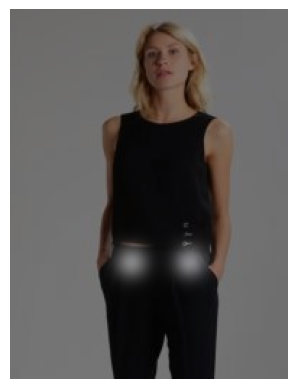

In [25]:
path1 = "/kaggle/input/acgpn-dataset/ACGPN_traindata/train_img/009416_0.jpg"
path2 = "/kaggle/working/train_posemaps_4c/hip/h_posemap4c_009416_0_resized.png"
img1 = mpimg.imread(path1)
img2 = mpimg.imread(path2)
print(img1.shape, img2.shape)
fig, ax = plt.subplots()
ax.imshow(img1)
ax.imshow(img2, alpha=0.5)
ax.axis('off')
plt.show()


In [26]:
import zipfile

In [27]:
def zip_directory(directory_path, zip_file_path):
    """
    Zip a directory and its contents.

    Parameters:
    - directory_path (str): Path to the directory to be zipped.
    - zip_file_path (str): Path to the output zip file.

    Returns:
    - None
    """
    with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(directory_path):
            for file in files:
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, directory_path))

In [28]:
zip_directory("/kaggle/working/train_posemaps_4c/hip","/kaggle/working/train_posemaps_4c/hip.zip")